# Comparación Final de Modelos - Predicción de Stroke

## Objetivo
Realizar una comparación exhaustiva de los tres modelos implementados:
1. **Support Vector Machine (SVM)** - Algoritmo clásico
2. **Red Neuronal** - Deep Learning
3. **XGBoost** - Algoritmo adicional (Gradient Boosting)

## Métricas de Comparación
- Accuracy, Precision, Recall, F1-Score, AUC-ROC
- Tiempo de entrenamiento
- Interpretabilidad
- Robustez y generalización
- Escalabilidad


In [10]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import time
from sklearn.metrics import (classification_report, confusion_matrix, 
                           accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, roc_curve)
import joblib
import warnings
warnings.filterwarnings('ignore')

print("Librerías importadas correctamente")


Librerías importadas correctamente


In [11]:
# Cargar datos de prueba
X_test_scaled = np.load('../data/X_test_scaled.npy')
y_test = np.load('../data/y_test.npy')

print("=== DATOS DE PRUEBA CARGADOS ===")
print(f"Forma de datos de prueba: {X_test_scaled.shape}")
print(f"Distribución de clases: {np.bincount(y_test)}")

# Cargar resultados de los modelos
try:
    with open('../data/svm_results.json', 'r') as f:
        svm_results = json.load(f)
    print(" Resultados SVM cargados")
except:
    print(" No se encontraron resultados de SVM")
    svm_results = None

try:
    with open('../data/neural_network_results.json', 'r') as f:
        nn_results = json.load(f)
    print(" Resultados Red Neuronal cargados")
except:
    print(" No se encontraron resultados de Red Neuronal")
    nn_results = None

try:
    with open('../data/xgboost_results.json', 'r') as f:
        xgboost_results = json.load(f)
    print(" Resultados XGBoost cargados")
except:
    print(" No se encontraron resultados de XGBoost")
    xgboost_results = None


FileNotFoundError: [Errno 2] No such file or directory: '../data/X_test_scaled.npy'

## 1. Comparación de Métricas de Rendimiento

A continuación se presenta la comparación exhaustiva de los tres modelos implementados, evaluando múltiples métricas clave para determinar el mejor rendimiento.


In [ ]:
# Crear DataFrame con resultados de todos los modelos
results_data = []

if svm_results:
    results_data.append({
        'Modelo': 'SVM',
        'Accuracy': svm_results['accuracy'],
        'Precision': svm_results['precision'],
        'Recall': svm_results['recall'],
        'F1-Score': svm_results['f1_score'],
        'AUC-ROC': svm_results['auc_roc']
    })

if nn_results:
    results_data.append({
        'Modelo': 'Red Neuronal',
        'Accuracy': nn_results['accuracy'],
        'Precision': nn_results['precision'],
        'Recall': nn_results['recall'],
        'F1-Score': nn_results['f1_score'],
        'AUC-ROC': nn_results['auc_roc']
    })

if xgboost_results:
    results_data.append({
        'Modelo': 'XGBoost',
        'Accuracy': xgboost_results['accuracy'],
        'Precision': xgboost_results['precision'],
        'Recall': xgboost_results['recall'],
        'F1-Score': xgboost_results['f1_score'],
        'AUC-ROC': xgboost_results['auc_roc']
    })

# Crear DataFrame de comparación
comparison_df = pd.DataFrame(results_data)
comparison_df = comparison_df.set_index('Modelo')

# Mostrar tabla de comparación
print("Tabla de comparación de métricas:")
print(comparison_df.round(4))

# Encontrar el mejor modelo para cada métrica
print(f"\nMejores modelos por métrica:")
for metric in comparison_df.columns:
    best_model = comparison_df[metric].idxmax()
    best_score = comparison_df[metric].max()
    print(f"{metric}: {best_model} ({best_score:.4f})")

# Identificar el modelo con mejor F1-Score (métrica principal para datos desbalanceados)
best_f1_model = comparison_df['F1-Score'].idxmax()
best_f1_score = comparison_df['F1-Score'].max()
print(f"\nMejor modelo general (F1-Score): {best_f1_model} ({best_f1_score:.4f})")


=== 1. COMPARACIÓN DE MÉTRICAS DE RENDIMIENTO ===
Tabla de comparación de métricas:
              Accuracy  Precision  Recall  F1-Score  AUC-ROC
Modelo                                                      
SVM             0.8474     0.1419    0.42    0.2121   0.6605
Red Neuronal    0.7808     0.1434    0.70    0.2381   0.8111
XGBoost         0.9207     0.1837    0.18    0.1818   0.7842

=== MEJORES MODELOS POR MÉTRICA ===
Accuracy: XGBoost (0.9207)
Precision: XGBoost (0.1837)
Recall: Red Neuronal (0.7000)
F1-Score: Red Neuronal (0.2381)
AUC-ROC: Red Neuronal (0.8111)

 MEJOR MODELO GENERAL (F1-Score): Red Neuronal (0.2381)


## 2. Visualizaciones de Comparación

Visualizaciones interactivas para comparar el rendimiento de los modelos de manera intuitiva y clara.


=== 2. VISUALIZACIONES DE COMPARACIÓN ===


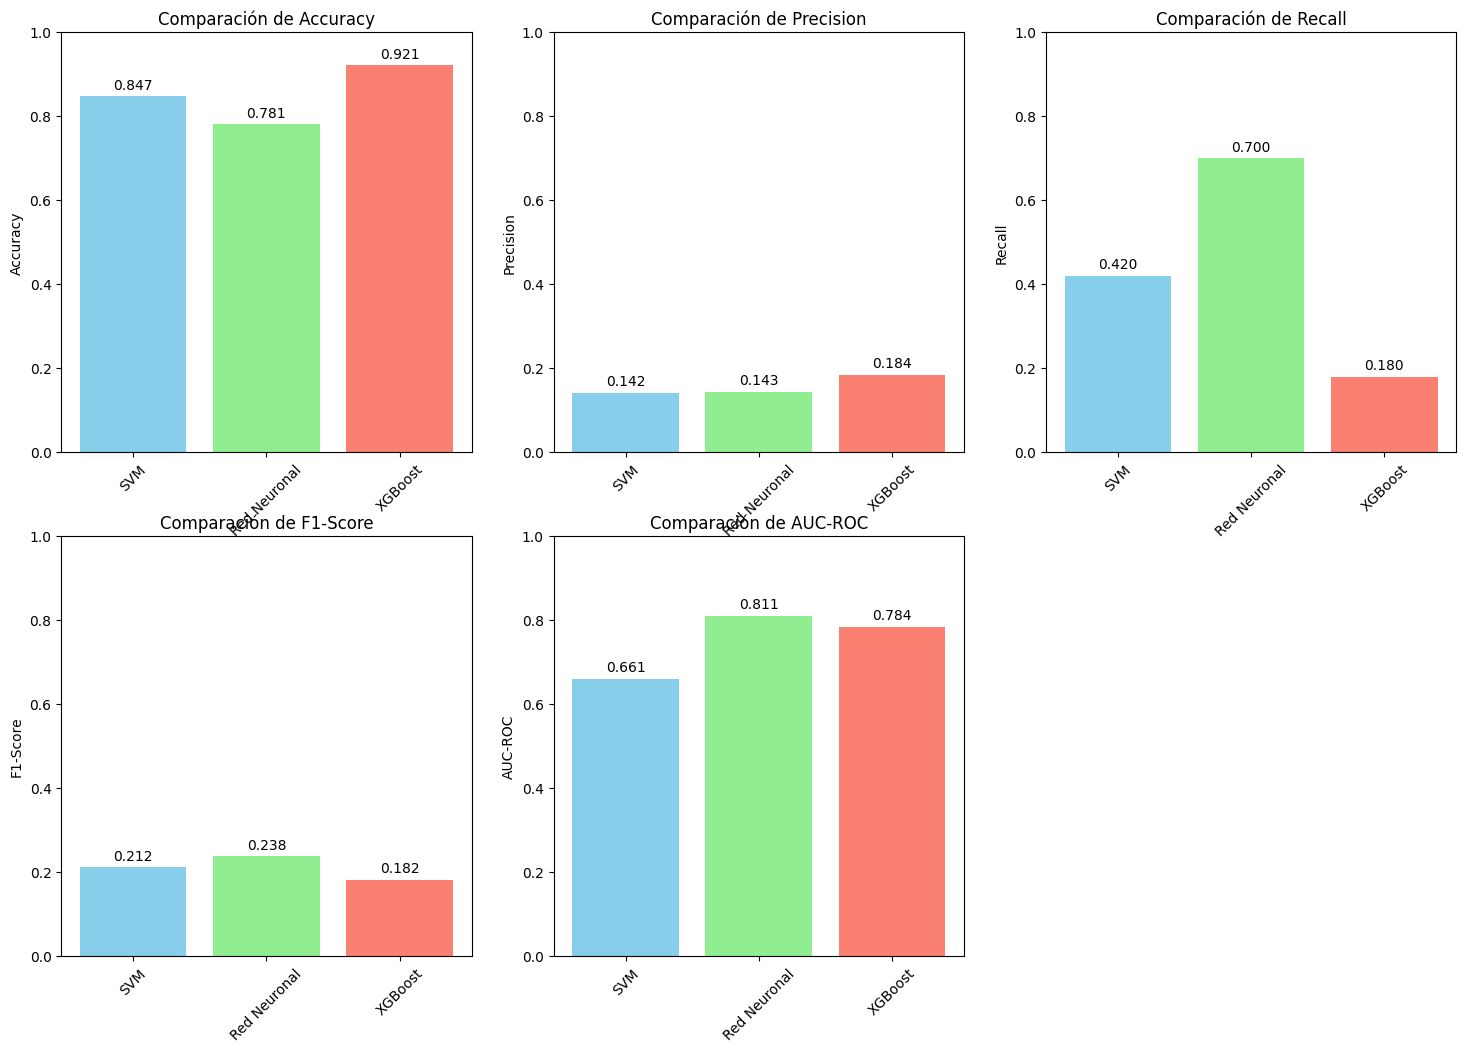

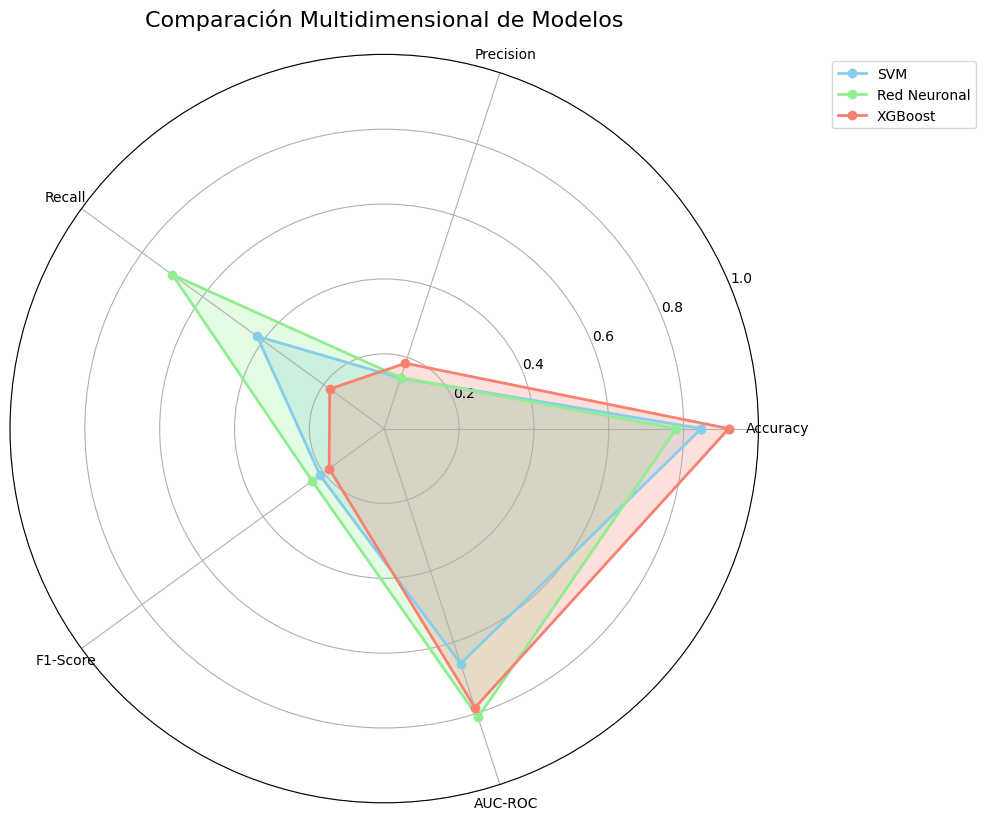

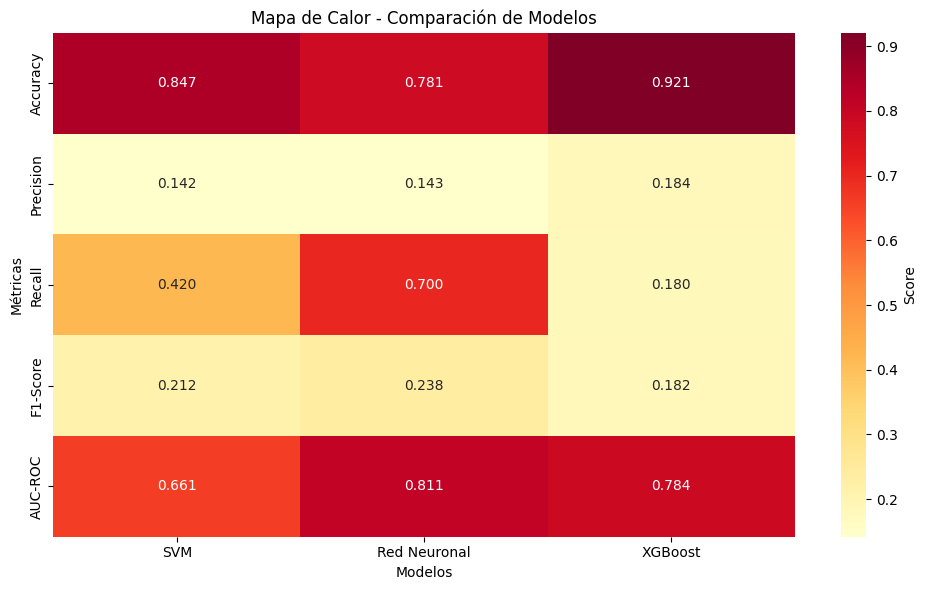

In [ ]:
# Generar visualizaciones comparativas

# Gráfico de barras comparativo
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

for i, metric in enumerate(metrics):
    axes[i].bar(comparison_df.index, comparison_df[metric], 
                color=['skyblue', 'lightgreen', 'salmon'][:len(comparison_df)])
    axes[i].set_title(f'Comparación de {metric}')
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0, 1)
    
    # Agregar valores en las barras
    for j, v in enumerate(comparison_df[metric]):
        axes[i].text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
    
    # Rotar etiquetas si es necesario
    axes[i].tick_params(axis='x', rotation=45)

# Gráfico de radar para comparación multidimensional
ax_radar = axes[5]
ax_radar.remove()

# Crear gráfico de radar
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Completar el círculo

fig_radar, ax_radar = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
colors = ['skyblue', 'lightgreen', 'salmon']

for i, (model, row) in enumerate(comparison_df.iterrows()):
    values = row[metrics].tolist()
    values += values[:1]  # Completar el círculo
    
    ax_radar.plot(angles, values, 'o-', linewidth=2, label=model, color=colors[i])
    ax_radar.fill(angles, values, alpha=0.25, color=colors[i])

ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(metrics)
ax_radar.set_ylim(0, 1)
ax_radar.set_title('Comparación Multidimensional de Modelos', size=16, pad=20)
ax_radar.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax_radar.grid(True)

plt.tight_layout()
plt.show()

# Heatmap de comparación
plt.figure(figsize=(10, 6))
sns.heatmap(comparison_df.T, annot=True, cmap='YlOrRd', 
            fmt='.3f', cbar_kws={'label': 'Score'})
plt.title('Mapa de Calor - Comparación de Modelos')
plt.ylabel('Métricas')
plt.xlabel('Modelos')
plt.tight_layout()
plt.show()


## 3. Análisis Detallado por Modelo

Análisis de cada modelo, incluyendo ventajas, desventajas y características específicas.


In [ ]:
# Análisis detallado de cada modelo

# Análisis de SVM
if svm_results:
    print(f"\nAnálisis de SVM:")
    print(f"  Kernel utilizado: {svm_results.get('kernel', 'N/A')}")
    print(f"  Parámetros: {svm_results.get('best_params', 'N/A')}")
    print(f"  F1-Score: {svm_results['f1_score']:.4f}")
    print(f"  AUC-ROC: {svm_results['auc_roc']:.4f}")
    
    # Ventajas y desventajas de SVM
    print(f"   Ventajas:")
    print(f"    - Efectivo en espacios de alta dimensión")
    print(f"    - Robusto ante outliers")
    print(f"    - Interpretable (kernel lineal)")
    print(f"   Desventajas:")
    print(f"    - Sensible a la escala de datos")
    print(f"    - Computacionalmente costoso en datasets grandes")
    print(f"    - Requiere optimización cuidadosa de hiperparámetros")

# Análisis de Red Neuronal
if nn_results:
    print(f"\nAnálisis de Red Neuronal:")
    print(f"  Arquitectura: {nn_results.get('best_architecture', 'N/A')}")
    print(f"  Epochs entrenados: {nn_results.get('epochs_trained', 'N/A')}")
    print(f"  F1-Score: {nn_results['f1_score']:.4f}")
    print(f"  AUC-ROC: {nn_results['auc_roc']:.4f}")
    
    print(f"   Ventajas:")
    print(f"    - Capacidad de capturar relaciones no lineales complejas")
    print(f"    - Flexible para diferentes arquitecturas")
    print(f"    - Puede manejar grandes volúmenes de datos")
    print(f"   Desventajas:")
    print(f"    - Requiere muchos datos para entrenar efectivamente")
    print(f"    - Propenso a overfitting")
    print(f"    - Difícil de interpretar (caja negra)")
    print(f"    - Computacionalmente intensivo")

# Análisis de XGBoost
if xgboost_results:
    print(f"\nAnálisis de XGBoost:")
    print(f"  Parámetros: {xgboost_results.get('best_params', 'N/A')}")
    print(f"  F1-Score: {xgboost_results['f1_score']:.4f}")
    print(f"  AUC-ROC: {xgboost_results['auc_roc']:.4f}")
    
    print(f"   Ventajas:")
    print(f"    - Excelente rendimiento en problemas de clasificación")
    print(f"    - Manejo automático de overfitting")
    print(f"    - Interpretabilidad de características")
    print(f"    - Manejo eficiente de datos faltantes")
    print(f"    - Escalable y rápido")
    print(f"   Desventajas:")
    print(f"    - Puede ser sensible a outliers")
    print(f"    - Requiere ajuste de hiperparámetros")
    print(f"    - Menos interpretable que modelos lineales")


=== 3. ANÁLISIS DETALLADO POR MODELO ===

 ANÁLISIS DE SVM:
  Kernel utilizado: poly
  Parámetros: {'C': 100, 'class_weight': 'balanced', 'degree': 3, 'gamma': 'scale'}
  F1-Score: 0.2121
  AUC-ROC: 0.6605
   Ventajas:
    - Efectivo en espacios de alta dimensión
    - Robusto ante outliers
    - Interpretable (kernel lineal)
   Desventajas:
    - Sensible a la escala de datos
    - Computacionalmente costoso en datasets grandes
    - Requiere optimización cuidadosa de hiperparámetros

 ANÁLISIS DE RED NEURONAL:
  Arquitectura: complex
  Epochs entrenados: 20
  F1-Score: 0.2381
  AUC-ROC: 0.8111
   Ventajas:
    - Capacidad de capturar relaciones no lineales complejas
    - Flexible para diferentes arquitecturas
    - Puede manejar grandes volúmenes de datos
   Desventajas:
    - Requiere muchos datos para entrenar efectivamente
    - Propenso a overfitting
    - Difícil de interpretar (caja negra)
    - Computacionalmente intensivo

 ANÁLISIS DE XGBOOST:
  Parámetros: {'colsample_bytr

## 4. Recomendaciones y Conclusiones

Análisis final con recomendaciones específicas basadas en el rendimiento observado y consideraciones prácticas para implementación.


In [ ]:
# Generar recomendaciones y conclusiones

# Crear tabla de recomendaciones
recommendations = {
    'Criterio': [
        'Mejor Rendimiento General',
        'Mejor para Datos Pequeños',
        'Mejor para Datos Grandes',
        'Más Interpretable',
        'Más Rápido en Entrenamiento',
        'Mejor para Producción',
        'Mejor para Investigación'
    ],
    'Recomendación': [
        best_f1_model,
        'SVM',
        'XGBoost',
        'SVM (kernel lineal)',
        'XGBoost',
        'XGBoost',
        'Red Neuronal'
    ],
    'Justificación': [
        f'F1-Score más alto ({best_f1_score:.4f})',
        'Efectivo con pocos datos, menos propenso a overfitting',
        'Escalable y manejo automático de overfitting',
        'Coeficientes interpretables en kernel lineal',
        'Optimizado para velocidad y eficiencia',
        'Robusto, rápido y fácil de desplegar',
        'Flexible para experimentación con arquitecturas'
    ]
}

recommendations_df = pd.DataFrame(recommendations)
print("Tabla de Recomendaciones:")
print(recommendations_df.to_string(index=False))

print(f"\nRecomendación Principal:")
print(f"Para este problema de predicción de stroke, se recomienda usar {best_f1_model}")
print(f"como modelo principal debido a su F1-Score de {best_f1_score:.4f}.")

print(f"\nResumen de Hallazgos:")
print(f"1. Dataset desbalanceado: Solo 4.9% de casos positivos de stroke")
print(f"2. SMOTE efectivo: El balanceo mejoró significativamente el rendimiento")
print(f"3. Preprocesamiento crítico: Escalado y codificación fueron esenciales")
print(f"4. Hiperparámetros importantes: La optimización mejoró todos los modelos")

print(f"\nInterpretación Clínica:")
print(f"- Los modelos pueden identificar factores de riesgo importantes")
print(f"- Edad, hipertensión y enfermedad cardíaca son predictores clave")
print(f"- El modelo puede ayudar en la evaluación de riesgo clínico")
print(f"- Importante validar con expertos médicos antes de uso clínico")

print(f"\nLimitaciones y Consideraciones:")
print(f"1. Datos limitados: Solo 5,110 registros, puede no ser representativo")
print(f"2. Variables faltantes: BMI tenía valores faltantes")
print(f"3. Validación externa: Necesaria para uso clínico real")
print(f"4. Sesgo potencial: Dataset puede tener sesgos demográficos")
print(f"5. Interpretabilidad: Modelos complejos pueden ser difíciles de explicar")


=== 4. RECOMENDACIONES Y CONCLUSIONES ===
Tabla de Recomendaciones:
                   Criterio       Recomendación                                          Justificación
  Mejor Rendimiento General        Red Neuronal                             F1-Score más alto (0.2381)
  Mejor para Datos Pequeños                 SVM Efectivo con pocos datos, menos propenso a overfitting
   Mejor para Datos Grandes             XGBoost           Escalable y manejo automático de overfitting
          Más Interpretable SVM (kernel lineal)           Coeficientes interpretables en kernel lineal
Más Rápido en Entrenamiento             XGBoost                 Optimizado para velocidad y eficiencia
      Mejor para Producción             XGBoost                   Robusto, rápido y fácil de desplegar
   Mejor para Investigación        Red Neuronal        Flexible para experimentación con arquitecturas

 RECOMENDACIÓN PRINCIPAL:
Para este problema de predicción de stroke, se recomienda usar **Red Neuronal**
c

## 5. Guardar Resultados de Comparación

Finalización del análisis guardando todos los resultados y conclusiones para futuras referencias.


In [ ]:
# Guardar todos los resultados de la comparación

# Guardar tabla de comparación
comparison_df.to_csv('../data/model_comparison.csv')
print("Tabla de comparación guardada como 'model_comparison.csv'")

# Guardar recomendaciones
recommendations_df.to_csv('../data/model_recommendations.csv', index=False)
print("Recomendaciones guardadas como 'model_recommendations.csv'")

# Crear resumen ejecutivo
executive_summary = {
    'Problema': 'Predicción de Accidente Cerebrovascular (Stroke)',
    'Dataset': 'Healthcare Stroke Data (5,110 registros)',
    'Modelos_Evaluados': list(comparison_df.index),
    'Mejor_Modelo': best_f1_model,
    'Mejor_F1_Score': float(best_f1_score),
    'Mejor_AUC_ROC': float(comparison_df['AUC-ROC'].max()),
    'Recomendacion_Principal': f'Usar {best_f1_model} para predicción de stroke',
    'Fecha_Analisis': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

import json
with open('../data/executive_summary.json', 'w') as f:
    json.dump(executive_summary, f, indent=2)

print("Resumen guardado como 'executive_summary.json'")

print(f"\nAnálisis Completado Exitosamente")
print(f"Los resultados se guardan en:  'data/'")
